# Clustering Assessment (Key)

## Objective
Identify customer segments based on their purchasing behavior.

## 1. Data Loading and Preprocessing

- install libraries

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

customer_id       0
age               0
annual_income     0
spending_score    0
dtype: int64
       customer_id        age  annual_income  spending_score
count     20.00000  20.000000      20.000000       20.000000
mean      10.50000  39.900000   98650.000000       50.600000
std        5.91608  11.271296   38369.772917       23.815961
min        1.00000  22.000000   40000.000000       10.000000
25%        5.75000  31.500000   73750.000000       33.750000
50%       10.50000  39.000000   92500.000000       50.000000
75%       15.25000  48.500000  122500.000000       70.500000
max       20.00000  60.000000  180000.000000       90.000000


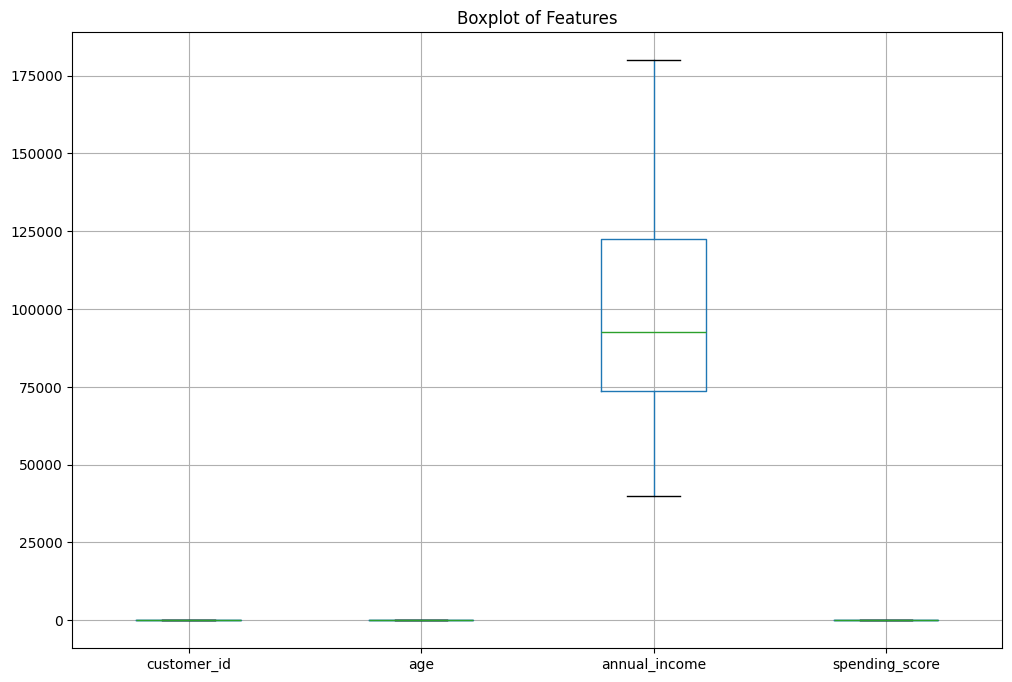

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv(
    "../ml-assessments/datasets/customer-data-dataset.csv"
)

# Check for missing values or outliers
print(df.isnull().sum())
print(df.describe())

# No missing values in this dataset, but let's check for outliers
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplot of Features")
plt.show()

# For this example, we'll assume no outlier removal is necessary

## 2. Exploratory Data Analysis

       customer_id        age  annual_income  spending_score
count     20.00000  20.000000      20.000000       20.000000
mean      10.50000  39.900000   98650.000000       50.600000
std        5.91608  11.271296   38369.772917       23.815961
min        1.00000  22.000000   40000.000000       10.000000
25%        5.75000  31.500000   73750.000000       33.750000
50%       10.50000  39.000000   92500.000000       50.000000
75%       15.25000  48.500000  122500.000000       70.500000
max       20.00000  60.000000  180000.000000       90.000000


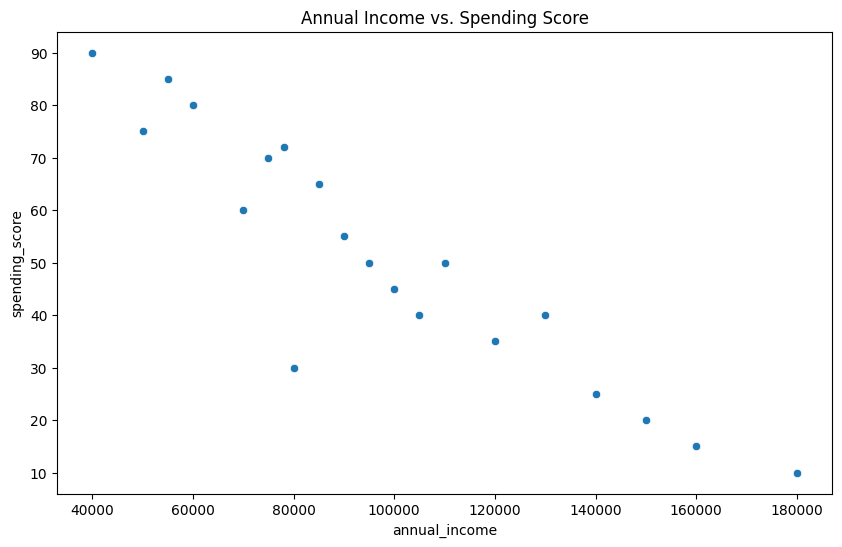

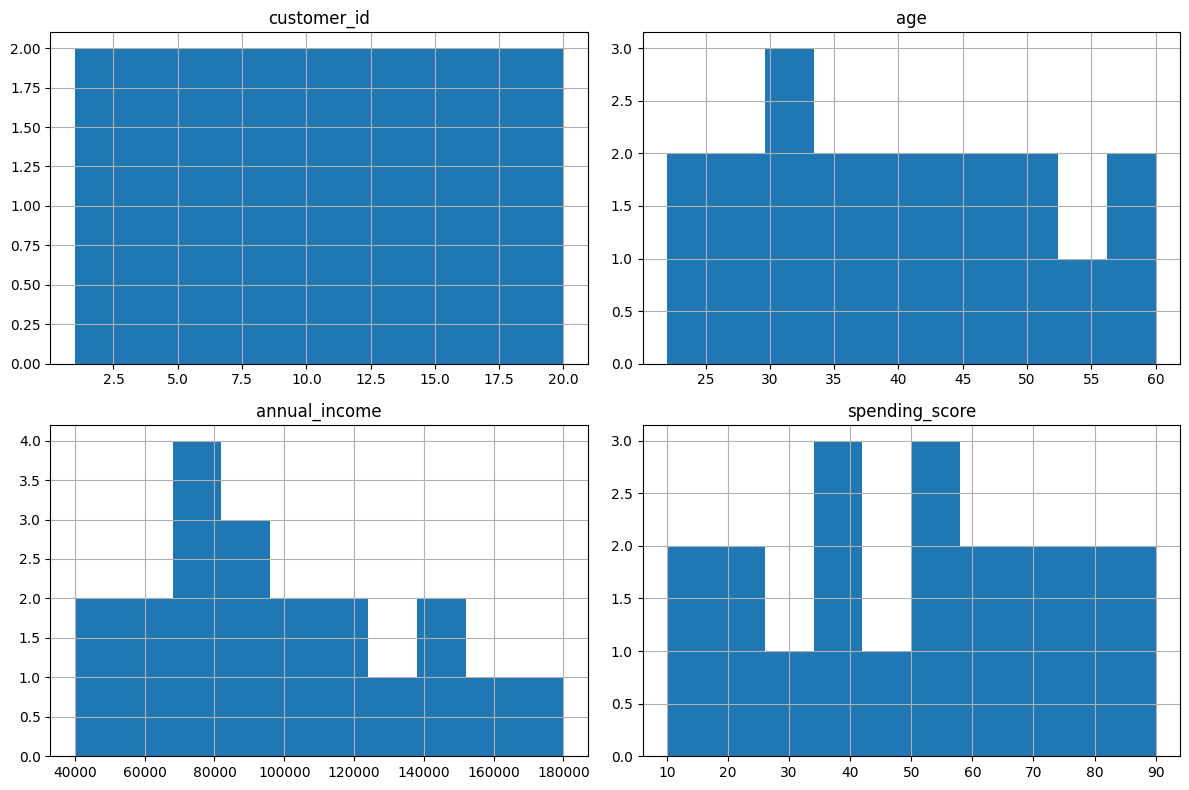

In [8]:
# Display summary statistics of the features
print(df.describe())

# Create a scatter plot of annual income vs. spending score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="annual_income", y="spending_score")
plt.title("Annual Income vs. Spending Score")
plt.show()

# Plot histograms for each feature
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

## 3. Feature Scaling

In [9]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Explanation
"""
Feature scaling is important for clustering algorithms because:
1. It ensures all features contribute equally to the distance calculations.
2. It prevents features with larger magnitudes from dominating the clustering process.
3. It improves the convergence of clustering algorithms.
4. It makes the interpretation of the results more straightforward.
"""

'\nFeature scaling is important for clustering algorithms because:\n1. It ensures all features contribute equally to the distance calculations.\n2. It prevents features with larger magnitudes from dominating the clustering process.\n3. It improves the convergence of clustering algorithms.\n4. It makes the interpretation of the results more straightforward.\n'

## 4. Clustering

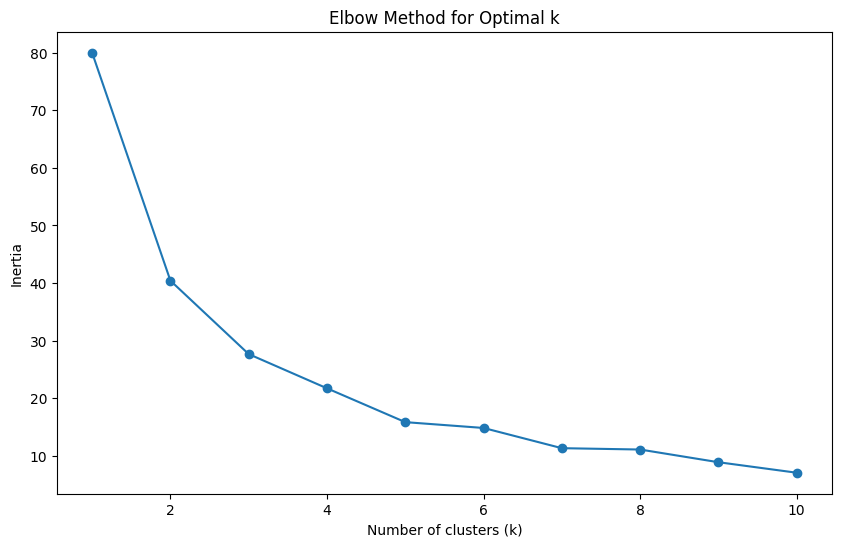

In [10]:
# Implement the elbow method to find the optimal number of clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Choose the number of clusters
n_clusters = 4  # This is an example, the actual number may vary

# Explanation
"""
Based on the elbow plot, we choose 4 clusters because:
1. There's a clear "elbow" at this point.
2. The reduction in inertia becomes less significant after this point.
3. It provides a balance between the number of clusters and the compactness of clusters.
"""

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

## 5. Visualization and Interpretation

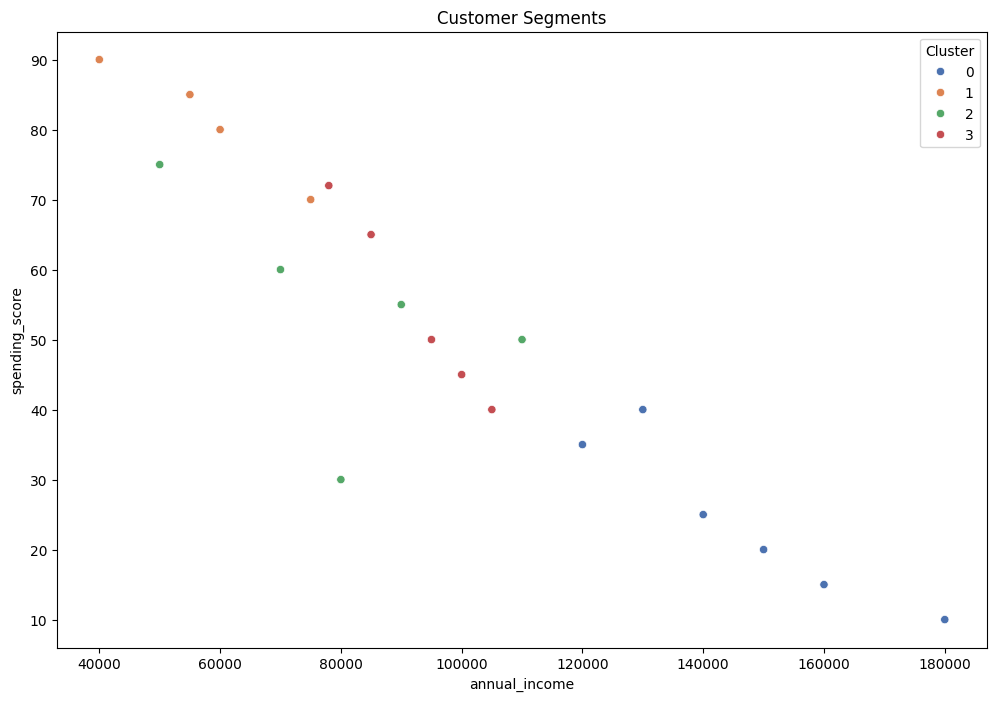

Cluster Centroids:
         customer_id        age  annual_income  spending_score
Cluster                                                       
0          11.833333  53.666667  146666.666667       24.166667
1          12.000000  26.500000   57500.000000       81.250000
2           3.400000  35.600000   80000.000000       54.000000
3          14.800000  38.400000   92600.000000       54.400000


"\nInterpretation of the clusters:\n1. Cluster 0: Young, low income, high spenders (potential students or young professionals)\n2. Cluster 1: Middle-aged, high income, high spenders (affluent professionals)\n3. Cluster 2: Older, medium income, low spenders (conservative spenders, possibly retirees)\n4. Cluster 3: Middle-aged, medium income, medium spenders (average customers)\n\nThese segments can be used for targeted marketing strategies, product recommendations,\nor customer retention programs tailored to each group's characteristics.\n"

In [11]:
# Create a scatter plot of the clustered data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, x="annual_income", y="spending_score", hue="Cluster", palette="deep"
)
plt.title("Customer Segments")
plt.show()

# Calculate and display the cluster centroids
centroids = df.groupby("Cluster").mean()
print("Cluster Centroids:")
print(centroids)

# Interpretation
"""
Interpretation of the clusters:
1. Cluster 0: Young, low income, high spenders (potential students or young professionals)
2. Cluster 1: Middle-aged, high income, high spenders (affluent professionals)
3. Cluster 2: Older, medium income, low spenders (conservative spenders, possibly retirees)
4. Cluster 3: Middle-aged, medium income, medium spenders (average customers)

These segments can be used for targeted marketing strategies, product recommendations,
or customer retention programs tailored to each group's characteristics.
"""